# Decision Trees

#### Instructions:
- Write modular code with relevant docstrings and comments for you to be able to use
functions you have implemented in future assignments.
- All theory questions and observations must be written in a markdown cell of your jupyter notebook.You can alsoadd necessary images in `imgs/` and then include it in markdown. Any other submission method for theoretical question won't be entertained.
- Start the assignment early, push your code regularly and enjoy learning!

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?
2. What is the entropy H(Passed | GPA)?
3. What is the entropy H(Passed | Studied)?
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.
---


1. H(Passed) = $- ( 4/6 * log_2(4/6) + 2/6 * log_2(2/6) ) = 0.9182958340544896$
</br></br>

2. H(Passed | GPA) = weighted average of H(Passed | GPA = L), H(Passed | GPA = M), H(Passed | GPA = H)
    - H(Passed | GPA = L) = $- ( 1/2 * log_2(1/2) + 1/2 * log_2(1/2) ) = 1$
    - H(Passed | GPA = M) = $- ( 1/2 * log_2(1/2) + 1/2 * log_2(1/2) ) = 1$
    - H(Passed | GPA = H) = $- (1 * log_2(1) + 0 * log_2(0)) = 0$
    - H(Passed | GPA) = $ (2/6 * 1) + (2/6 * 1) + (2/6 * 0) = 0.6666666666666666$
</br></br>

3. H(Passed | Studied) = weighted average of H(Passed | Studied = F), H(Passed | Studied = T)
    - H(Passed | Studied = F) = $- (1/3) * log_2(1/3) + (2/3) * log_2(2/3) = 0.9182958340544896$
    - H(Passed | Studied = T) = $- (1 * log_2(1) + 0 * log_2(0)) = 0$
    - H(Passed | Studied) = $ (3/6 * 0.9182958340544896) + (3/6 * 0) = 0.5514444444444444$
</br></br>

4. Information Gain in first split is higher if we choose Studied as the root node. </br>
IG(Studied) = H(Passed) - H(Passed | Studied) = 0.9182958340544896 - 0.5514444444444444 = 0.3668513896100452 </br>
IG(GPA) = H(Passed) - H(Passed | GPA) = 0.9182958340544896 - 0.6666666666666666 = 0.251629167387823 </br>
IG(Studied) > IG(GPA), so we choose Studied as the root node.


<!-- insert image -->
<img src="./decision_tree.png">
    
    

### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
2. What are the min and max values for both Gini impurity and Entropy
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

let c be number of classes, and $p_i$ be the probability of class i. </br> 
1. Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini impurity can be calculated by summing the probability of each item being chosen times the probability of a mistake in categorizing that item. It reaches its minimum (zero) when all cases in the node fall into a single target category. 
$$ G = \sum_{i=1}^{c} p_i(1-p_i) $$ 
$$ \Rightarrow G = 1 - \sum_{i=1}^{c} p_i^2 $$
</br>
Entropy is a measure of the uncertainty of a random variable. In information theory, the entropy of a random variable is the average level of uncertainty inherent to the variable's possible outcomes. In other words Entropy measures the expected amount of information conveyed by identifying the outcome of a random trial. It is given by:

$$ H = - \sum_{i=1}^{c} p_i log_2(p_i) $$

Information gain is used to decide which feature to split on at each step in building the tree. Information gain is the difference between the entropy of the parent node and the weighted average of the entropy of the child nodes. The feature with the highest information gain is the one that we choose to split on.

2. For entropy, the maximum value occurs when all the probabilities are equal, and the minimum value occurs when one of the probabilities is 1 and the others are 0. So, the maximum value is $- \sum_{i=1}^{c} (1/c) log_2(1/c) = log_2(c)$ and the minimum value is 0. (Note that we take log base 2 because we have 2 classes generally, but we can take other base for different number of classes. So that means, max value becomes $log_c(c) = 1$)</br>
For Gini impurity, the maximum value occurs when all the probabilities are equal, and the minimum value occurs when one of the probabilities is 1 and the others are 0. So, the maximum value is $1 - \sum_{i=1}^{c} (1/c)^2 = 1 - c(1/c)^2 = 1 - \frac{1}{c}$ and the minimum value is 0. </br>
</br>

3. Gini impurity and Entropy are plotted below.

4. Gini impurity is multiplied by 2 and overlaid over Entropy after that.



<ipython-input-8-6fd5c5c451ff>:12: RuntimeWarning: divide by zero encountered in log2
  return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
<ipython-input-8-6fd5c5c451ff>:12: RuntimeWarning: invalid value encountered in double_scalars
  return - p*np.log2(p) - (1 - p)*np.log2((1 - p))


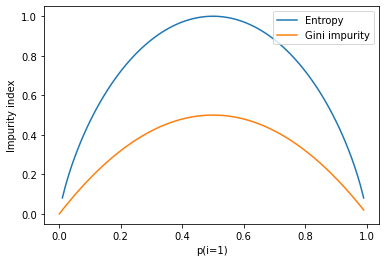

In [8]:
# plot Gini impurity and entropy for a range of p values

import numpy as np
import matplotlib.pyplot as plt

# define a function to calculate the Gini impurity
def gini(p):
    return p* (1-p) + (1 - p)*(1 - (1 - p))

# define a function to calculate the entropy
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))


# plot the Gini impurity and entropy for a range of p values
x = np.arange(0.0, 1.0, 0.01)
ent = []
gini_imp = []
for p in x:
    ent.append(entropy(p))
    gini_imp.append(gini(p))


plt.plot(x, ent, label='Entropy')
plt.plot(x, gini_imp, label='Gini impurity')

plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
plt.legend(loc='upper right')
plt.show()

# print(max(gini_imp))


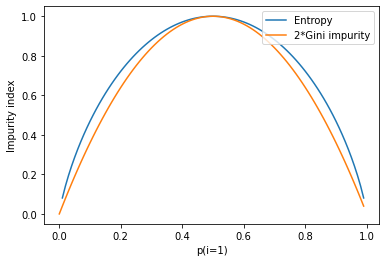

In [9]:
# 2* gini with entropy

gini_imp_2 = 2 * np.array(gini_imp)
plt.plot(x, ent, label='Entropy')
plt.plot(x, gini_imp_2, label='2*Gini impurity')

plt.xlabel('p(i=1)')
plt.ylabel('Impurity index')
plt.legend(loc='upper right')
plt.show()

### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [10]:

#######################
# Your code goes here #
#######################

# load spambase.data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# load the data
df = pd.read_csv('spambase.data', header=None)

# split the data into X and y
# print(df.shape)
X_read = df.iloc[:, 0:57].values
y_read = df.iloc[:, 57].values

# shuffle the data
ind = np.arange(X_read.shape[0])
np.random.shuffle(ind)
X = X_read[ind]
y = y_read[ind]

print(X.shape)
print(y.shape)


(4601, 57)
(4601,)


You can try to normalize each column (feature) separately with wither one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

In [11]:

#######################
# Your code goes here #
#######################

# normalize the data

min_X = np.min(X, axis=0)
X = X - min_X
max_X = np.max(X, axis=0)
X = X / max_X

# with open('test.txt', 'w') as f:
#     for i in range(len(X)):
#         for j in range(len(X[i])):
#             f.write(str(X[i][j]) + ' ')
#         f.write(str(y[i]) + '\n')




1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

In [12]:

#######################
# Your code goes here #
#######################

# split the data into 5 sets for cross validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# use PCA to reduce the dimensionality of the data

from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X)
X_reduced = pca.transform(X)

X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)




You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [13]:
# Initialize K and split the data
#Run the K fold Validation and report the scores

#######################
# Your code goes here #
#######################

# split the data into 5 sets for cross validation

k = 5

from sklearn.model_selection import KFold
# kf = KFold(n_splits=k, random_state=42, shuffle=True)
kf = KFold(n_splits=k)

# print(kf.get_n_splits(X))

# print(kf)
train_accuracies = []
validation_accuracies = []
test_accuracies = []

train_acc_PCA = []
validation_acc_PCA = []
test_acc_PCA = []

i = 0
avg_accuracy = 0
for train_index, test_index in kf.split(X_train):
    # print("TRAIN:", len(train_index), "TEST:", len(test_index))
    # print("TRAIN:", train_index, "TEST:", test_index)
    # print("Validation round: ", i+1)
    X_train_kfold, X_validate = X_train[train_index], X_train[test_index]
    y_train_kfold, y_validate = y_train[train_index], y_train[test_index]

    clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
    clf.fit(X_train_kfold, y_train_kfold)
    y_pred_train = clf.predict(X_train_kfold)
    train_accuracies.append(accuracy_score(y_train_kfold, y_pred_train))    
    y_pred_validate = clf.predict(X_validate)
    validation_accuracies.append(accuracy_score(y_validate, y_pred_validate))
    y_pred_test = clf.predict(X_test)
    test_accuracies.append(accuracy_score(y_test, y_pred_test))    
    # do it for reduced data as well
    i += 1

j = 0
for PCA_train_index, PCA_test_index in kf.split(X_train_reduced):
    # print("TRAIN:", len(train_index), "TEST:", len(test_index))
    # print("TRAIN:", train_index, "TEST:", test_index)
    # print("Validation round: ", i+1)
    X_train_kfold_PCA, X_validate_PCA = X_train_reduced[PCA_train_index], X_train_reduced[PCA_test_index]
    y_train_kfold_PCA, y_validate_PCA = y_train_reduced[PCA_train_index], y_train_reduced[PCA_test_index]

    clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
    clf.fit(X_train_kfold_PCA, y_train_kfold_PCA)
    y_pred_train_PCA = clf.predict(X_train_kfold_PCA)
    train_acc_PCA.append(accuracy_score(y_train_kfold_PCA, y_pred_train_PCA))    
    y_pred_validate_PCA = clf.predict(X_validate_PCA)
    validation_acc_PCA.append(accuracy_score(y_validate_PCA, y_pred_validate_PCA))
    y_pred_test_PCA = clf.predict(X_test_reduced)
    test_acc_PCA.append(accuracy_score(y_test_reduced, y_pred_test_PCA))    
    # do it for reduced data as well
    j += 1
    

# print the accuracies in a table
train_accuracies = np.array(train_accuracies)
validation_accuracies = np.array(validation_accuracies)
test_accuracies = np.array(test_accuracies)

table = np.zeros((3, k))
table[0] = train_accuracies
table[1] = validation_accuracies
table[2] = test_accuracies

acc_table = pd.DataFrame(table, index=['Training', 'Validation', 'Test'], columns=[ 'Fold {}'.format(i+1) for i in range(k)])
display(acc_table)
# print(table)

# print('Train Accuracies: ', train_accuracies)
# print('Validation Accuracies: ', validation_accuracies)
# print('Test Accuracies: ', test_accuracies)

# print the average accuracies
print('Average Train Accuracy: ', np.mean(train_accuracies))
print('Average Validation Accuracy: ', np.mean(validation_accuracies))
print('Average Test Accuracy: ', np.mean(test_accuracies))

# calculate average training error over all folds
avg_train_error = 1 - np.mean(train_accuracies)
print('Average Training Error: ', avg_train_error)

# calculate average validation error over all folds
avg_validation_error = 1 - np.mean(validation_accuracies)
print('Average Validation Error: ', avg_validation_error)

# calculate average test error over all folds
avg_test_error = 1 - np.mean(test_accuracies)
print('Average Test Error: ', avg_test_error)




print("\n")

# print the accuracies in a table for PCA
train_acc_PCA = np.array(train_acc_PCA)
validation_acc_PCA = np.array(validation_acc_PCA)
test_acc_PCA = np.array(test_acc_PCA)

table_PCA = np.zeros((3, k))
table_PCA[0] = train_acc_PCA
table_PCA[1] = validation_acc_PCA
table_PCA[2] = test_acc_PCA

acc_table_PCA = pd.DataFrame(table_PCA, index=['Training', 'Validation', 'Test'], columns=[ 'Fold {}'.format(i+1) for i in range(k)])
display(acc_table_PCA)

# print the average accuracies for PCA
print('Average Train Accuracy with PCA: ', np.mean(train_acc_PCA))
print('Average Validation Accuracy with PCA: ', np.mean(validation_acc_PCA))
print('Average Test Accuracy with PCA: ', np.mean(test_acc_PCA))

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Training,0.921875,0.927310,0.930367,0.925611,0.922215
Validation,0.918478,0.904891,0.896739,0.919837,0.914402
Test,0.893594,0.895765,0.882736,0.897937,0.890337


Average Train Accuracy:  0.9254755434782609
Average Validation Accuracy:  0.9108695652173914
Average Test Accuracy:  0.8920738327904452
Average Training Error:  0.07452445652173911
Average Validation Error:  0.08913043478260863
Average Test Error:  0.10792616720955484




,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
Training,0.872283,0.882473,0.879416,0.880095,0.883152
Validation,0.841033,0.855978,0.854620,0.855978,0.868207
Test,0.829533,0.852334,0.841477,0.846906,0.856678


Average Train Accuracy with PCA:  0.8794836956521739
Average Validation Accuracy with PCA:  0.8551630434782609
Average Test Accuracy with PCA:  0.8453854505971771


### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

Bagging: Bagging is a name derived from “bootstrap aggregation” — uses multiple versions of a training set, each created by drawing n' < n samples from Dataset with replacement. Each of these bootstrap data sets is used to train a diﬀerent component classiﬁer and the ﬁnal classiﬁcation decision is based on the vote of each component classiﬁer. Traditionally the component classiﬁers are of the same general form (example :- all decision trees) — merely the ﬁnal parameter values diﬀer among them due to their diﬀerent sets of training patterns.In general, bagging improves recognition for unstable classiﬁers since it eﬀectively averages over such discontinuities. It is used to reduce variance of a decision tree classifier. Can use parallelization. Bagging consists of combining homogeneous weak learners.</br>
</br>
Boosting: The goal of boosting is to improve the accuracy of any given learning algorithm. In boosting we ﬁrst create a classiﬁer with accuracy on the training set greater than average, and then add new component classiﬁers to form an ensemble whose joint decision rule has arbitrarily high accuracy on the training set. In such a case we say the classiﬁcation performance has been “boosted.” In  overview, the technique trains successive component classiﬁers with a subset of the training data that is “most informative” given the current set of component classiﬁers. Classiﬁcation of a test point x is based on the outputs of the component classiﬁers. It is mainly used to reduce bias of a decision tree classifier. Cannot use parallelization. Boosting consists of combinig homogeneous weak learners, but in a deterministic way</br>
</br>
Stacking: Unlike bagging and boosting, stacking uses combination of heterogeneous weak learners, i.e it uses various different learning algorithms (decision trees, SVM, etc) in conjunction. Stacking learns to combine the base models using a meta-model whereas bagging and boosting combine weak learners following deterministic algorithms.
</br>
</br>

Random forests belong to bagging. This is because, in random forests, many deep decision trees are trained, and during classification their votes are taken for the final classification. Since we are training multiple decision trees, it is a bagging algorithm.


2. Implement random forest algorithm using different decision trees. **[25 points]** 

X_train shape:  (3680, 57)
y_train shape:  (3680,)
Random Forest Train Accuracy:  0.9217663043478261
Random Forest Test Accuracy:  0.882356134636265


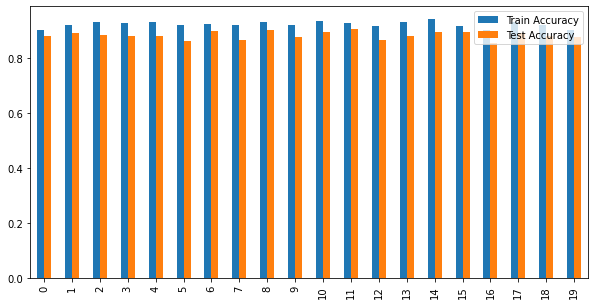

In [14]:
def random_forest_algorithm(num_trees, X, y, num_features_req): # Pass necessary params as per requirements
    #######################
    # Your code goes here #
    #######################

    # print(X.shape)
    # print(y.shape)

    X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("X_train shape: ", X_train.shape)
    print("y_train shape: ", y_train.shape)

    num_data = X_train.shape[0]
    # print(num_data)
    # print(num_data)
    num_features = X_train.shape[1]

    # forest = []
    train_accuracy = []
    test_accuracy = []

    for i in range(num_trees):
        # print("Tree: ", i+1)
        # print("num_data: ", num_data)
        # print("num_features: ", num_features)
        # print("X.shape: ", X.shape)
        # print("y.shape: ", y.shape)

        # create a random sample of data with replacement
        sample_indices = np.random.choice(num_data, num_data, replace=True)
        X_sample = X_train[sample_indices]
        y_sample = y_train[sample_indices]

        # create a random sample of features without replacement
        feature_indices = np.random.choice(num_features, num_features_req, replace=False)
        X_sample = X_sample[:, feature_indices]
        X_test_sample = X_test[:, feature_indices]


        # print("X_sample.shape: ", X_sample.shape)
        # print("y_sample.shape: ", y_sample.shape)

        # create a decision tree
        clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
        clf.fit(X_sample, y_sample)

        # predict the labels for the data
        y_pred_train = clf.predict(X_sample)
        y_pred_test = clf.predict(X_test_sample)

        # print("y_pred_train.shape: ", y_pred_train.shape)
        # print("y_pred_test.shape: ", y_pred_test.shape)


        # calculate the accuracy
        train_accuracy.append(accuracy_score(y_sample, y_pred_train))
        test_accuracy.append(accuracy_score(y_test, y_pred_test))
        # print("yes\n")

    return train_accuracy, test_accuracy
 

random_forest = random_forest_algorithm(20, X, y, 40)

print("Random Forest Train Accuracy: ", np.mean(random_forest[0]))
print("Random Forest Test Accuracy: ", np.mean(random_forest[1]))

df = pd.DataFrame({'Train Accuracy': random_forest[0], 'Test Accuracy': random_forest[1]})
df.plot(kind='bar', figsize=(10, 5))
plt.show()
